In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,GlobalMaxPooling2D,BatchNormalization,LayerNormalization

from keras.src.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data = pd.read_csv('/content/drive/MyDrive/Datasets/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_data.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame = pd.DataFrame(my_data)

In [ ]:
my_frame.shape

(372450, 785)

In [ ]:
my_frame.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
# Splitting the data into features (x) and labels (y)


x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [ ]:
# Splitting the data into training and testing sets, and reshaping the features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

In [ ]:
print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [ ]:
# Dictionary mapping numerical labels to corresponding letters

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

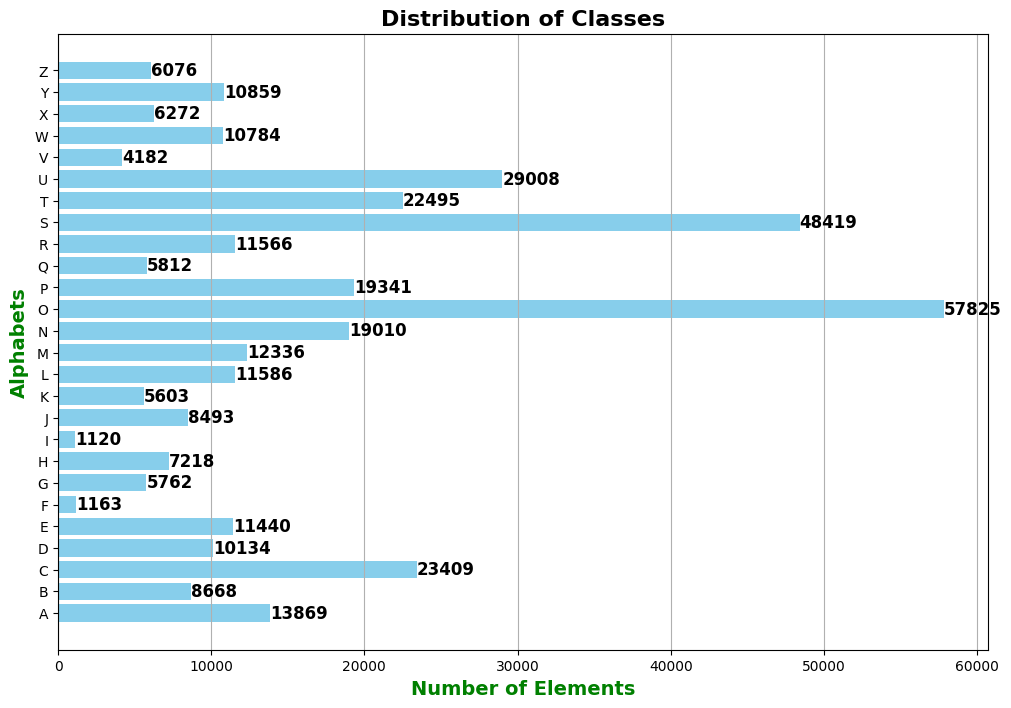

In [ ]:
# Count the occurrences of each class
class_counts = my_frame['0'].value_counts().sort_index()

# Get the list of alphabets
alphabets = [word_dict[i] for i in class_counts.index]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(alphabets, class_counts, color='skyblue')
plt.xlabel('Number of Elements', fontsize=14, fontweight='bold', color='green')
plt.ylabel('Alphabets', fontsize=14, fontweight='bold', color='green')
plt.title('Distribution of Classes', fontsize=16, fontweight='bold')
plt.grid(axis='x')

# Add count numbers on the bars
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}',
             va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.show()


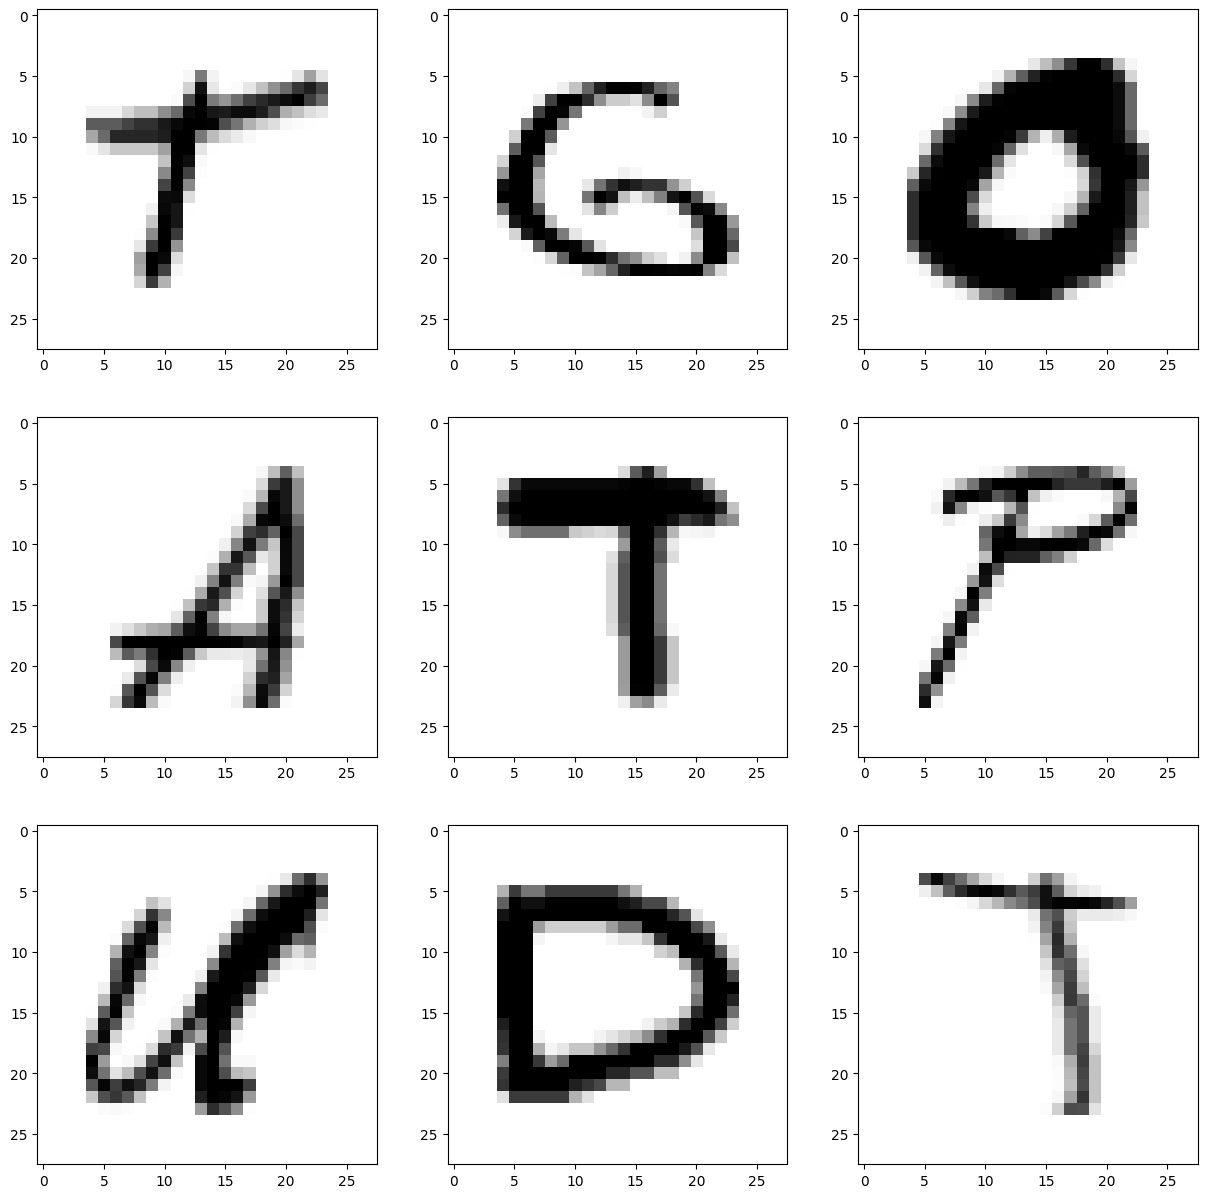

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()
plt.style.use('default')


# Shuffling and plotting a subset of training data samples

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [ ]:
# Reshaping the training and testing data to add a channel dimension

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [ ]:
# One-hot encoding the training labels and testing labels

categorical_train = to_categorical(y_train, num_classes=26)
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes=26)
print("New shape of test labels:", categorical_test.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
my_model = Sequential()

# Convolutional layers with BatchNormalization
my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))

my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(BatchNormalization())
my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))

my_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(BatchNormalization())
my_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
my_model.add(Flatten())

# Dense layers with Dropout
my_model.add(Dense(256, activation="relu"))
my_model.add(Dropout(0.5))
my_model.add(Dense(128, activation="relu"))
my_model.add(Dropout(0.5))

# Output layer
my_model.add(Dense(26, activation="softmax"))

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Compiling the model

my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the model on the training data and validating on the testing data
history = my_model.fit(x_train, categorical_train, epochs = 50, validation_data = (x_test, categorical_test))

Epoch 1/50
9312/9312 [==============================] - 102s 10ms/step - loss: 0.2843 - accuracy: 0.9245 - val_loss: 0.0733 - val_accuracy: 0.9834
Epoch 2/50
9312/9312 [==============================] - 83s 9ms/step - loss: 0.1052 - accuracy: 0.9761 - val_loss: 0.0488 - val_accuracy: 0.9886
Epoch 3/50
9312/9312 [==============================] - 83s 9ms/step - loss: 0.0751 - accuracy: 0.9832 - val_loss: 0.0441 - val_accuracy: 0.9899
Epoch 4/50
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0600 - accuracy: 0.9865 - val_loss: 0.0459 - val_accuracy: 0.9912
Epoch 5/50
9312/9312 [==============================] - 82s 9ms/step - loss: 0.0522 - accuracy: 0.9882 - val_loss: 0.0365 - val_accuracy: 0.9917
Epoch 6/50
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0465 - accuracy: 0.9895 - val_loss: 0.0440 - val_accuracy: 0.9917
Epoch 7/50
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0416 - accuracy: 0.9904 - val_loss: 0.0429 - val_

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


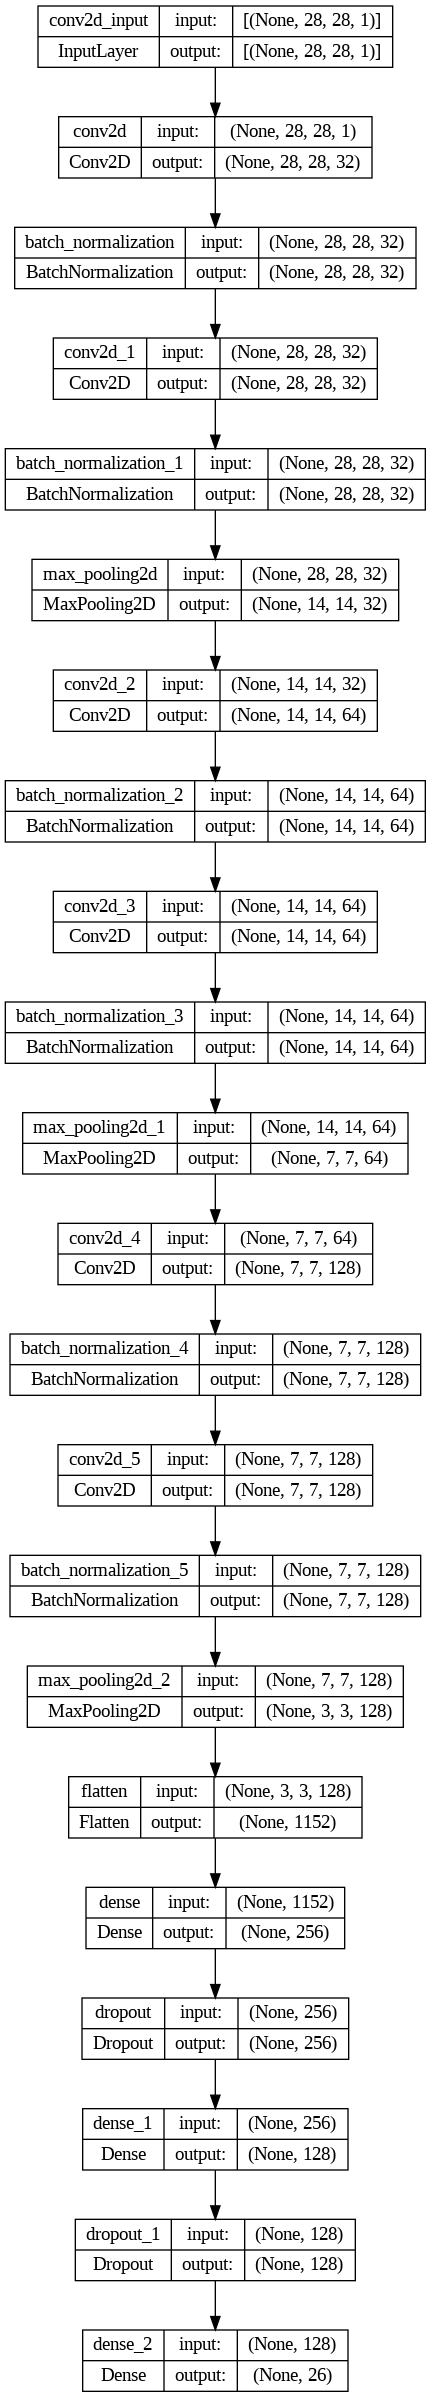

In [ ]:
# Model Summary
my_model.summary()

my_model.save(r'model_BN-50.h5')

from keras.utils import plot_model

# Visualizing the model architecture and saving it to an image file
plot_model(my_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9834206104278564, 0.9886159300804138, 0.9898509979248047, 0.9911934733390808, 0.9916901588439941, 0.9917304515838623, 0.9921466112136841, 0.9936635494232178, 0.9935427308082581, 0.9935293197631836, 0.9927909970283508, 0.9929386377334595, 0.9937307238578796, 0.9932608604431152, 0.9946972727775574, 0.9941871166229248, 0.9948449730873108, 0.9937441349029541, 0.9941334128379822, 0.9927909970283508, 0.9947106838226318, 0.9945630431175232, 0.9938515424728394, 0.9943616390228271, 0.9936099052429199, 0.9942542910575867, 0.9944959282875061, 0.9939589500427246, 0.9948717951774597, 0.9951268434524536, 0.993448793888092, 0.9950060248374939, 0.9943482279777527, 0.9945764541625977, 0.9943482279777527, 0.9941200017929077, 0.9945496320724487, 0.9946301579475403, 0.993999183177948, 0.993905246257782, 0.9948180913925171, 0.993247389793396, 0.9940662980079651, 0.993999183177948, 0.9940394759178162, 0.9937575459480286, 0.9942811131477356, 0.9937038421630859, 0.9928044080734

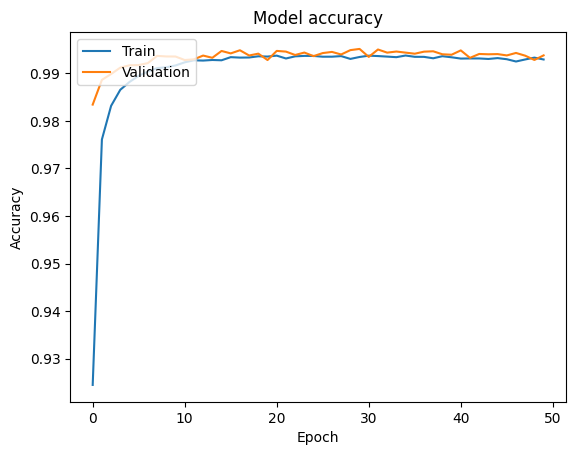

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

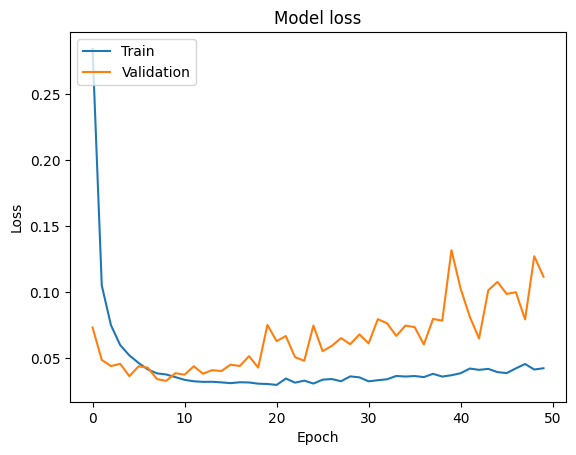

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

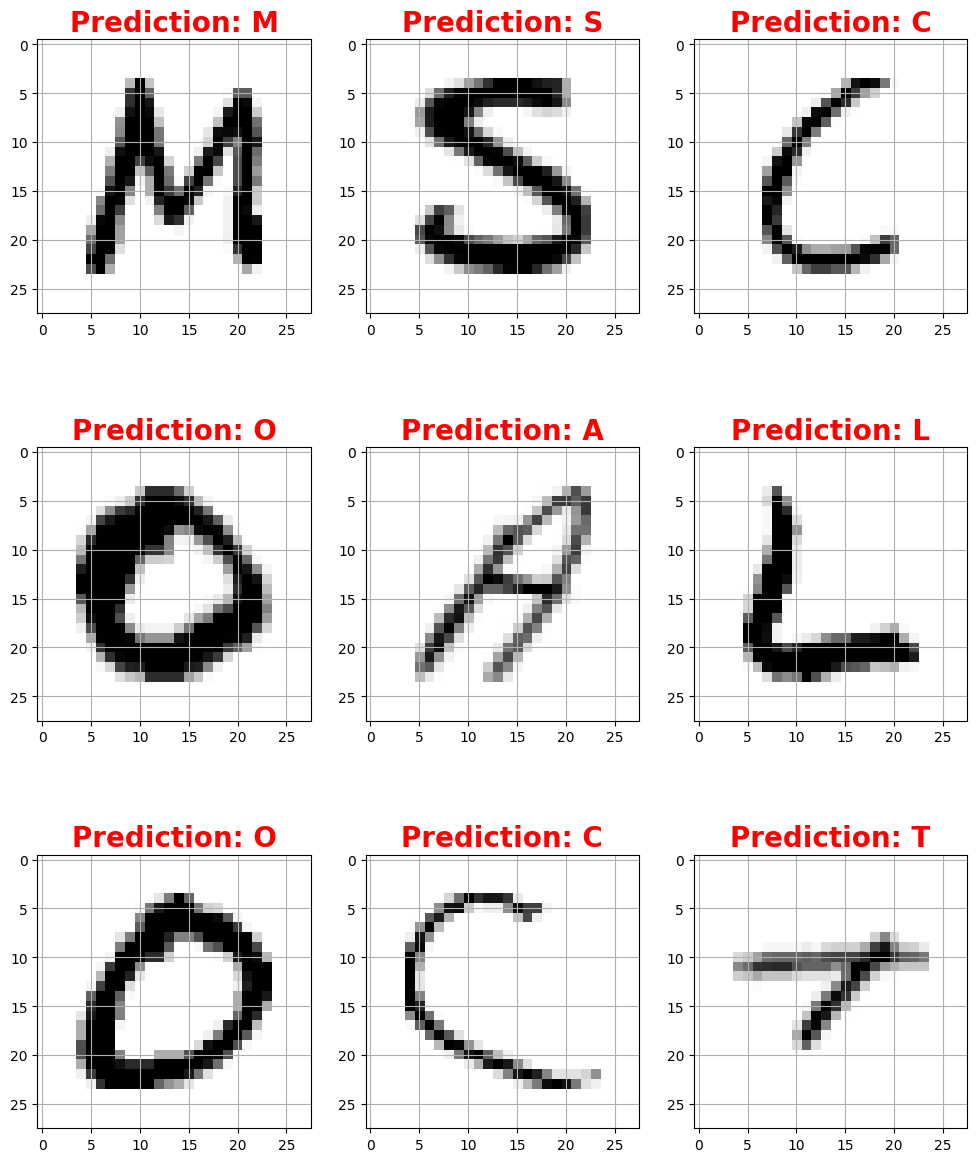

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()
plt.style.use('default')

# Creating subplots for displaying images and predictions
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')

    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()

2328/2328 [==============================] - 7s 3ms/step
Confusion Matrix:
[[71676     8]
 [    8  2798]]
Accuracy: 0.9997852060679285
Precision: 0.9971489665003563
Recall: 0.9971489665003563
F1 Score: 0.9971489665003563


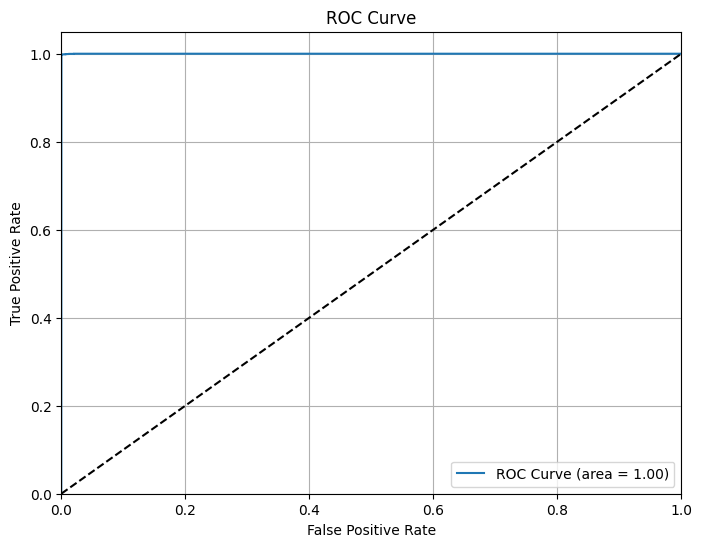

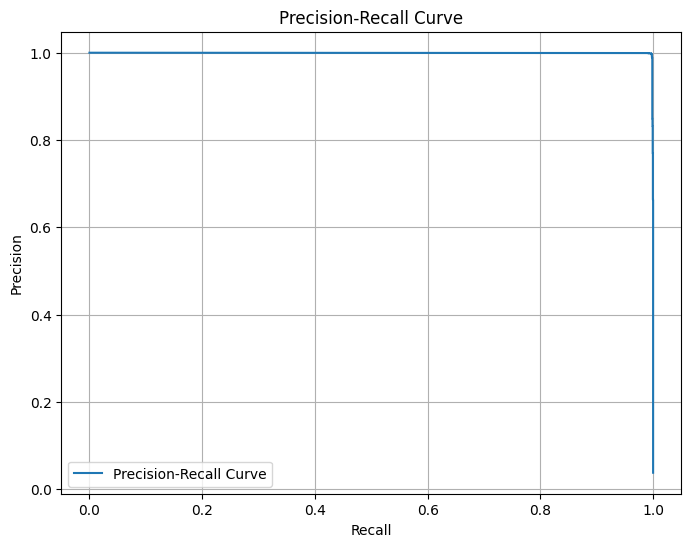

In [ ]:

# Evaluate the model on test data
y_pred = my_model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Predicted class labels

# One-vs-Rest Classification (choose a class for binary classification)
target_class = 0  # Modify this to the class you want binary classification for (0-25)

# Binarize predictions for the target class
y_test_binary = (y_test == target_class).astype(int)
y_pred_binary = (y_pred_class == target_class).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Accuracy, Precision, Recall, F1 Score
accuracy = np.mean((y_test_binary == y_pred_binary))
precision = np.sum((y_pred_binary * y_test_binary)) / np.sum(y_pred_binary)
recall = np.sum((y_pred_binary * y_test_binary)) / np.sum(y_test_binary)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred[:, target_class])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred[:, target_class])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score


# Evaluate the model
y_pred = my_model.predict(x_test)
y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(categorical_test, axis=1)

precision = precision_score(y_test_int, y_pred_int, average='weighted')
recall = recall_score(y_test_int, y_pred_int, average='weighted')
f1_score_value = f1_score(y_test_int, y_pred_int, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_value)


2328/2328 [==============================] - 6s 2ms/step
Precision: 0.9937983700694678
Recall: 0.9937709759699288
F1-score: 0.9937665936496555


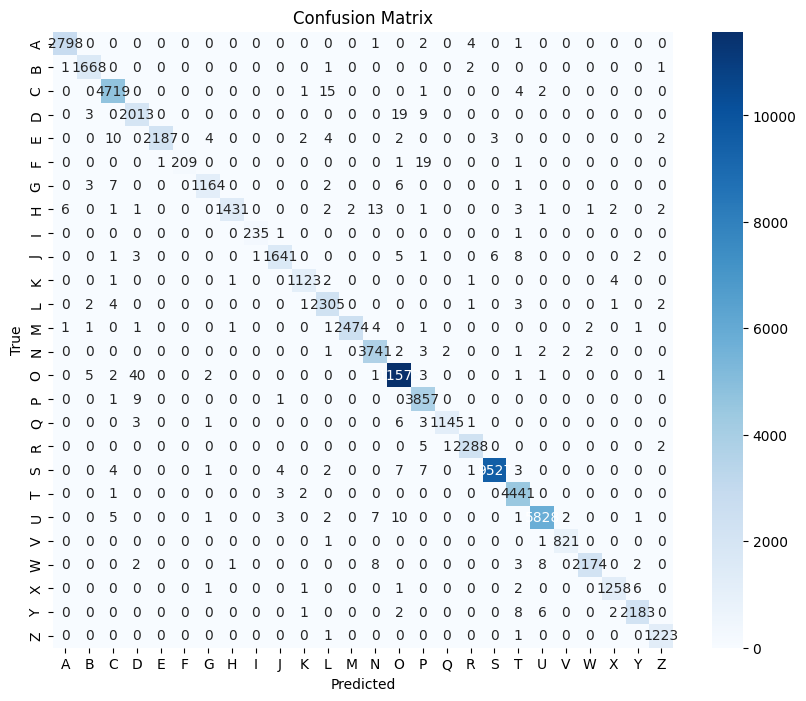

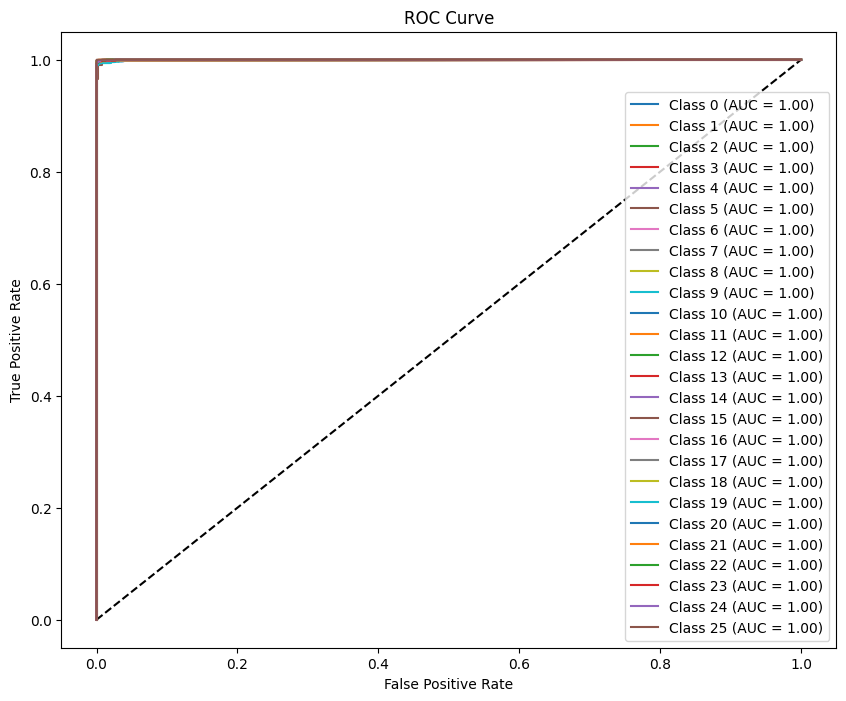

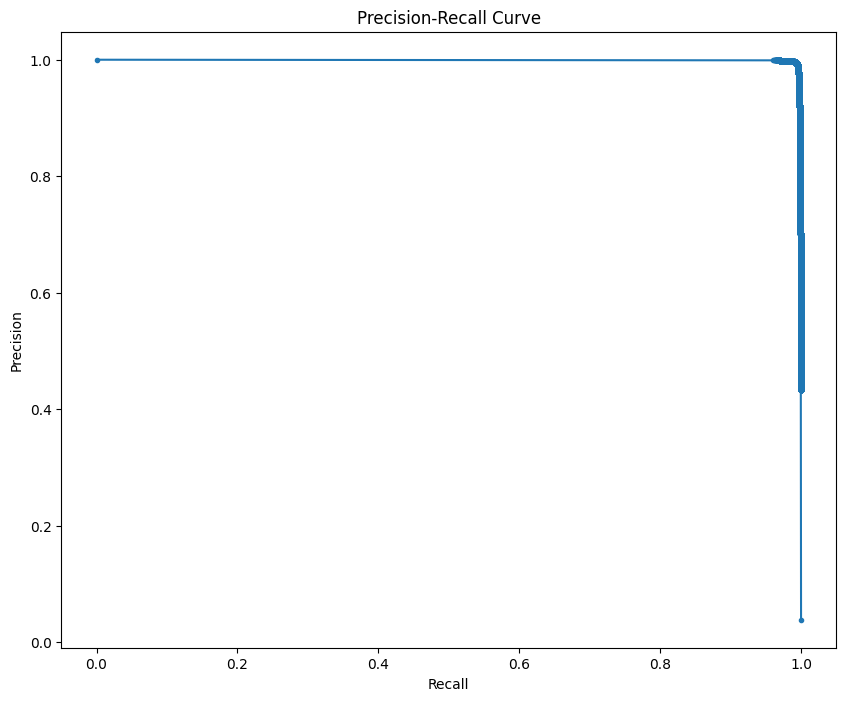

In [ ]:
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=alphabets, yticklabels=alphabets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(categorical_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(26):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision_, recall_, _ = precision_recall_curve(categorical_test.ravel(), y_pred.ravel())

plt.figure(figsize=(10, 8))
plt.plot(recall_, precision_, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()